<a href="https://colab.research.google.com/github/snowboarder-hk/hello-world/blob/master/learn2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pip
!pip install mglearn

import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances

#二次元訓練データの生成
X,y = mglearn.datasets.make_wave(n_samples=40)

print(X)

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=98cc00a437102a5fbf807c1ad427c31fcb88e5487928f9e0bd0f262351d73102
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]


In [2]:
print(y)

[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.47411033  1.53708251  0.86893293  1.87664889
  0.0945257  -1.41502356  0.25438895  0.09398858]


k最近傍法のクラス数は?5


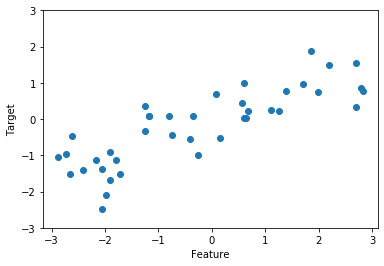

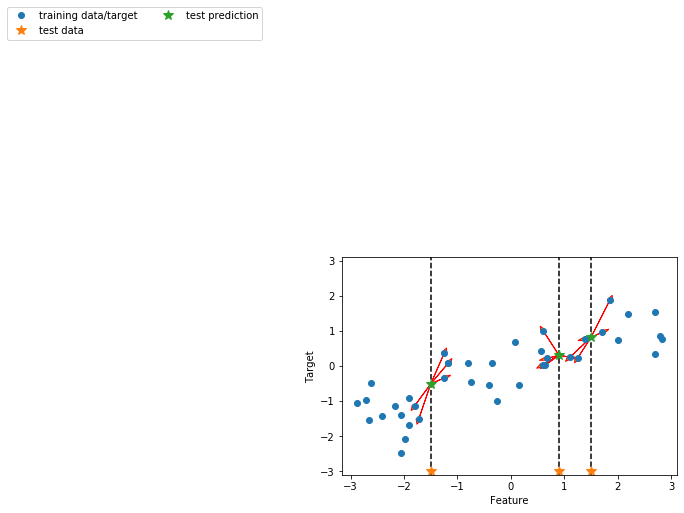

In [23]:
#2次元データの表示
plt.subplots()
plt.plot(X,y,"o")

#値域の設定
plt.ylim(-3,3)

plt.xlabel("Feature")
plt.ylabel("Target")

#クラス数kの入力
k= int(input("k最近傍法のクラス数は?"))

#検証データ(3点)の定義
X_test = np.array([[-1.5],[0.9],[1.5]])

#訓練データと検証データの距離の計算
dist = euclidean_distances(X,X_test)
closest = np.argsort(dist,axis=0)

#k最近傍法による回帰の実行
reg = KNeighborsRegressor(n_neighbors = k).fit(X,y)
y_pred = reg.predict(X_test)

#k個の最近傍と検証データを直線で結ぶ
plt.subplots()
for x,y_,neighbors in zip(X_test,y_pred,closest.T):
  for neighbor in neighbors[:k]:
      plt.arrow(x[0],y_,X[neighbor,0] - x[0],y[neighbor]-y_,head_width=.1,fc="y",ec="r")

#訓練データの表示
train,= plt.plot(X,y,"o")

#検証データの表示（橙色の星印）
test,=plt.plot(X_test,-3*np.ones(len(X_test)),"*",markersize=10)

#予測値の表示（緑色の星印）
pred, = plt.plot(X_test,y_pred,"*",markersize=10)

#検証データを通る垂線の表示
plt.vlines(X_test,-3.1,3.1,linestyle="--")

#値域の設定
plt.ylim(-3.1,3.1)

#軸ラベルの表示
plt.xlabel("Feature")
plt.ylabel("Target")

#凡例の表示
plt.legend([train,test,pred],["training data/target","test data","test prediction"],ncol=2,loc=(-1,2))